<a href="https://colab.research.google.com/github/arunmalik1/PlantLeaf_Classification/blob/main/PlantLeaf_Classification_RegModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is binary classification project using plant images. The idea is to be able to identify diseased vs healthy plants. There are 11 different plants and the entire dataet is divded into 22 categories. 

The dataset is from Kaggle: 
This is a collection of about 4503 images of which contains 2278 images of healthy leaf and 2225 images of the diseased leaf. Twelve plants named as Mango, Arjun, Alstonia Scholaris, Guava, Bael, Jamun, Jatropha, Pongamia Pinnata, Basil, Pomegranate, Lemon, and Chinar have been selected. Images are split between training, test, validating and prediction datasets for model training and testing purposes.



#Import Packages

In [1]:
#need pydicom for images
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.4 MB/s eta 0:00:00


In [2]:
#install opendatasets to get the data from Kaggle
!pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#installing keras tuner 
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.4 MB/s eta 0:00:00


In [4]:
!pip install -q -U keras-tuner

In [5]:
!pip install git+https://github.com/keras-team/keras-preprocessing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-fs6q1l9l
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-fs6q1l9l
  Resolved https://github.com/keras-team/keras-preprocessing.git to commit 3e380065d4afc7347aaee8d89325a16b22158438
  Preparing metadata (setup.py) ... done


In [6]:
!pip install --upgrade transformers
!pip install --upgrade datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 92.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 14.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [19]:
#import packages 
import pandas as pd
import numpy as np
import scipy


#import plot 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
%matplotlib inline
from PIL import Image
import PIL.Image
import seaborn as sns
from tabulate import tabulate
import os

#import keras and tenserflow and pydicom
import keras
import pydicom
import keras_tuner as kt
from keras import layers
from kerastuner import RandomSearch
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L1
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from kerastuner.engine.hyperparameters import HyperParameters


#import tenserflow functions
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization




#Import Data

In [8]:
#load the data 
import opendatasets as od
od.download("https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification?select=Plants_2", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arunmalik78
Your Kaggle Key: ··········


100%|██████████| 6.56G/6.56G [00:46<00:00, 150MB/s]


In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plant-leaves-for-image-classification/Plants_2/train',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256),
    batch_size = 32)

Found 4274 files belonging to 22 classes.


In [10]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plant-leaves-for-image-classification/Plants_2/test',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256)
    )

Found 110 files belonging to 22 classes.


In [11]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/plant-leaves-for-image-classification/Plants_2/valid',
    labels = 'inferred',
    label_mode = 'categorical',
    image_size = (256,256)
    )

Found 110 files belonging to 22 classes.


In [12]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 22), dtype=tf.float32, name=None))>

#Create a base CNN Model

In [13]:
#get the feature images and labels needed for model creation
# features, labels = next(iter(train_ds))

In [14]:
base_model1 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
base_model1.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
base_model1.add(MaxPooling2D(pool_size=(4, 4)))
# define 3x3 filter window sizes. Create 64 filters.
base_model1.add(Conv2D(64, (3, 3), activation='relu'))
base_model1.add(MaxPooling2D((2, 2)))
base_model1.add(Conv2D(128, (3, 3), activation='relu'))
base_model1.add(MaxPooling2D((2, 2)))
base_model1.add(Conv2D(256, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
base_model1.add(Flatten())
base_model1.add(Dense(64, activation='relu'))
base_model1.add(Dense(22, activation='softmax'))

In [15]:
base_model1.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [17]:
history_cnn = base_model1.fit(train_ds, epochs= 20, validation_data= validation_ds)

Epoch 1/20
134/134 [==============================] - 45s 310ms/step - loss: 3.3368 - accuracy: 0.1888 - val_loss: 2.9039 - val_accuracy: 0.1818
Epoch 2/20
134/134 [==============================] - 44s 310ms/step - loss: 1.7997 - accuracy: 0.4410 - val_loss: 1.8298 - val_accuracy: 0.4636
Epoch 3/20
134/134 [==============================] - 44s 307ms/step - loss: 1.3279 - accuracy: 0.5709 - val_loss: 1.5025 - val_accuracy: 0.5364
Epoch 4/20
134/134 [==============================] - 44s 310ms/step - loss: 0.9346 - accuracy: 0.7066 - val_loss: 1.1771 - val_accuracy: 0.6455
Epoch 5/20
134/134 [==============================] - 46s 313ms/step - loss: 0.7633 - accuracy: 0.7564 - val_loss: 1.4409 - val_accuracy: 0.5818
Epoch 6/20
134/134 [==============================] - 44s 309ms/step - loss: 0.6248 - accuracy: 0.7906 - val_loss: 1.6294 - val_accuracy: 0.6000
Epoch 7/20
134/134 [==============================] - 44s 309ms/step - loss: 0.5017 - accuracy: 0.8360 - val_loss: 1.3745 - val_ac

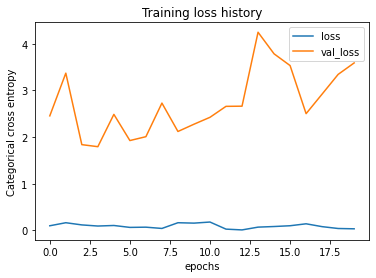

In [41]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

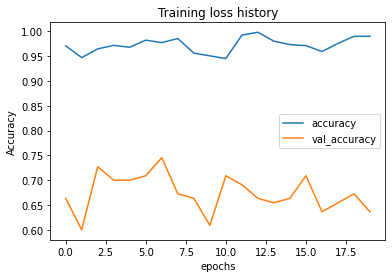

In [42]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [ ]:
base_model1.save('BaseModel.h5')

#Building in a simpler base model because of over fitting 

In [24]:
base_model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
base_model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
# define 3x3 filter window sizes. Create 32 filters.
base_model2.add(MaxPooling2D((2, 2)))
base_model2.add(Conv2D(32, (3, 3), activation='relu'))

base_model2.add(MaxPooling2D((2, 2)))
base_model2.add(Conv2D(32, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
base_model2.add(Flatten())
base_model2.add(Dense(32, activation='relu'))
base_model2.add(Dense(22, activation='softmax'))

In [25]:
base_model2.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [26]:
history_cnn = base_model2.fit(train_ds, epochs= 20, validation_data= validation_ds)

Epoch 1/20
134/134 [==============================] - 46s 319ms/step - loss: 4.9845 - accuracy: 0.1998 - val_loss: 2.6297 - val_accuracy: 0.1545
Epoch 2/20
134/134 [==============================] - 46s 322ms/step - loss: 1.8931 - accuracy: 0.4389 - val_loss: 2.2485 - val_accuracy: 0.3091
Epoch 3/20
134/134 [==============================] - 46s 324ms/step - loss: 1.2212 - accuracy: 0.6329 - val_loss: 2.3201 - val_accuracy: 0.3727
Epoch 4/20
134/134 [==============================] - 46s 322ms/step - loss: 0.7786 - accuracy: 0.7564 - val_loss: 2.6675 - val_accuracy: 0.4364
Epoch 5/20
134/134 [==============================] - 46s 322ms/step - loss: 0.4629 - accuracy: 0.8561 - val_loss: 2.6378 - val_accuracy: 0.4727
Epoch 6/20
134/134 [==============================] - 46s 324ms/step - loss: 0.2936 - accuracy: 0.9118 - val_loss: 3.1537 - val_accuracy: 0.4545
Epoch 7/20
134/134 [==============================] - 46s 325ms/step - loss: 0.2074 - accuracy: 0.9361 - val_loss: 3.7206 - val_ac

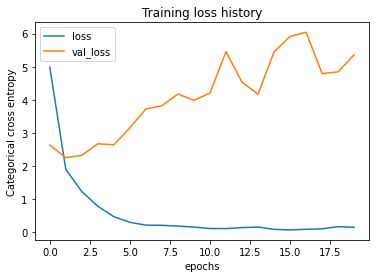

In [27]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

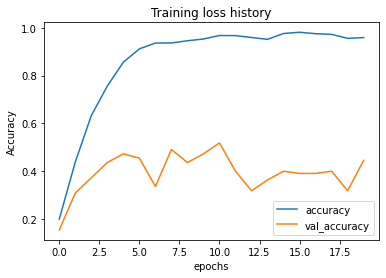

In [28]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

#Use regularizer techniques 

L1 (Lasso Regression)

In [29]:
reg = L1(1e-5)

In [35]:
L1_model = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
L1_model.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (3,3),
                        activation='relu',
                        input_shape=(256, 256, 3)))

# max pool in 2x2 window
L1_model.add(BatchNormalization())
L1_model.add(MaxPooling2D(pool_size=(4, 4)))
L1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

L1_model.add(BatchNormalization())
L1_model.add(MaxPooling2D((2, 2)))
L1_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
L1_model.add(Flatten())
L1_model.add(Dense(64, activation='relu'))
L1_model.add(Dropout(0.5)) 
L1_model.add(Dense(22, activation='softmax'))

In [36]:
opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-05)
L1_model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

In [37]:
history_cnn = L1_model.fit(train_ds, epochs= 50, validation_data= validation_ds)

Epoch 1/50
134/134 [==============================] - 47s 323ms/step - loss: 3.3062 - accuracy: 0.0849 - val_loss: 3.0378 - val_accuracy: 0.0636
Epoch 2/50
134/134 [==============================] - 46s 322ms/step - loss: 2.8612 - accuracy: 0.1362 - val_loss: 2.8732 - val_accuracy: 0.1545
Epoch 3/50
134/134 [==============================] - 46s 317ms/step - loss: 2.5986 - accuracy: 0.2103 - val_loss: 2.5790 - val_accuracy: 0.2182
Epoch 4/50
134/134 [==============================] - 47s 326ms/step - loss: 2.3583 - accuracy: 0.2733 - val_loss: 2.3389 - val_accuracy: 0.2636
Epoch 5/50
134/134 [==============================] - 47s 323ms/step - loss: 2.1419 - accuracy: 0.3435 - val_loss: 2.1326 - val_accuracy: 0.3091
Epoch 6/50
134/134 [==============================] - 47s 330ms/step - loss: 1.9437 - accuracy: 0.3994 - val_loss: 1.9770 - val_accuracy: 0.3545
Epoch 7/50
134/134 [==============================] - 48s 335ms/step - loss: 1.7551 - accuracy: 0.4593 - val_loss: 1.8498 - val_ac

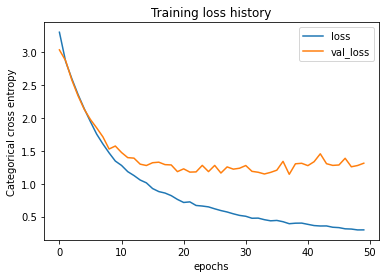

In [38]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

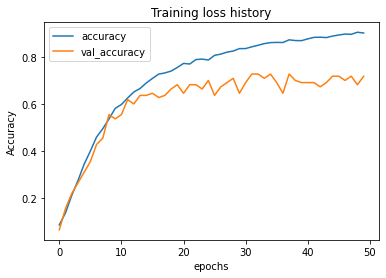

In [39]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

#Add data augmentation to further enchance model capabilities

L1 (Lasso Regression) + Data Augmentation

In [95]:
reg = L1(3e-5)

In [96]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

In [97]:
L1_model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
L1_model2.add(Conv2D(filters=32, kernel_size=(3, 3), strides = (2,2),
                     activation='relu', input_shape=(256, 256, 3),
                     kernel_regularizer = reg))

# max pool in 2x2 window
L1_model2.add(BatchNormalization())
L1_model2.add(MaxPooling2D(pool_size=(4, 4)))
data_augmentation
L1_model2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

L1_model2.add(BatchNormalization())
L1_model2.add(MaxPooling2D((2, 2)))
data_augmentation
L1_model2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

L1_model2.add(BatchNormalization())
L1_model2.add(MaxPooling2D((2, 2)))
data_augmentation
L1_model2.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
L1_model2.add(Flatten())
L1_model2.add(Dense(64, activation='relu'))
L1_model2.add(Dropout(0.6)) 
L1_model2.add(Dense(22, activation='softmax'))

In [98]:
opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-05)
L1_model2.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

In [99]:
history_cnn = L1_model2.fit(train_ds, epochs= 50, validation_data= validation_ds)

Epoch 1/50
134/134 [==============================] - 52s 353ms/step - loss: 3.2714 - accuracy: 0.0824 - val_loss: 3.0949 - val_accuracy: 0.0818
Epoch 2/50
134/134 [==============================] - 50s 348ms/step - loss: 2.8173 - accuracy: 0.1785 - val_loss: 2.8309 - val_accuracy: 0.1091
Epoch 3/50
134/134 [==============================] - 49s 346ms/step - loss: 2.4908 - accuracy: 0.2482 - val_loss: 2.4781 - val_accuracy: 0.2000
Epoch 4/50
134/134 [==============================] - 50s 348ms/step - loss: 2.1856 - accuracy: 0.3397 - val_loss: 2.1544 - val_accuracy: 0.3182
Epoch 5/50
134/134 [==============================] - 51s 354ms/step - loss: 1.9435 - accuracy: 0.4216 - val_loss: 1.9827 - val_accuracy: 0.3636
Epoch 6/50
134/134 [==============================] - 50s 346ms/step - loss: 1.7656 - accuracy: 0.4696 - val_loss: 1.7787 - val_accuracy: 0.4364
Epoch 7/50
134/134 [==============================] - 50s 349ms/step - loss: 1.6226 - accuracy: 0.5042 - val_loss: 1.6368 - val_ac

KeyboardInterrupt: ignored

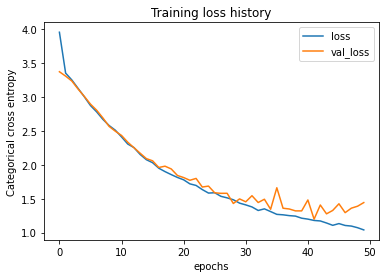

In [83]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

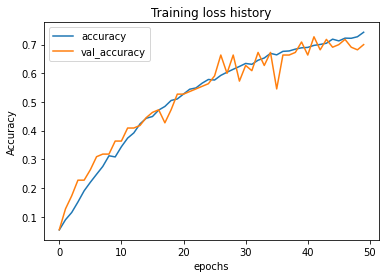

In [84]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

#L2 (Ridge Regression) regularizer with Augmentation

In [117]:
reg = L2(1e-5)

In [118]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

In [119]:
L2_model = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
L2_model.add(Conv2D(filters=32,
                        kernel_size=(3, 3), strides = (2,2),
                        activation='relu',
                        input_shape=(256, 256, 3),
                        kernel_regularizer = reg))

# max pool in 2x2 window
L2_model.add(BatchNormalization())
L2_model.add(MaxPooling2D(pool_size=(4, 4)))
data_augmentation
L2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

L2_model.add(BatchNormalization())
L2_model.add(MaxPooling2D((2, 2)))
data_augmentation
L2_model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer = reg))

# transition to dense fully-connected part of network
L2_model.add(Flatten())
L2_model.add(Dense(64, activation='relu'))
L1_model2.add(Dropout(0.6)) 
L2_model.add(Dense(22, activation='softmax'))

In [120]:
opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-05)
L2_model.compile(optimizer=opt, loss='categorical_crossentropy',  metrics=['accuracy'])

In [121]:
history_cnn = L2_model.fit(train_ds, epochs= 30, validation_data= validation_ds)

Epoch 1/30
134/134 [==============================] - 51s 352ms/step - loss: 2.5277 - accuracy: 0.2721 - val_loss: 3.1712 - val_accuracy: 0.1727
Epoch 2/30
134/134 [==============================] - 49s 345ms/step - loss: 1.2509 - accuracy: 0.6348 - val_loss: 1.6420 - val_accuracy: 0.6000
Epoch 3/30
134/134 [==============================] - 49s 344ms/step - loss: 0.7120 - accuracy: 0.8000 - val_loss: 1.3373 - val_accuracy: 0.6818
Epoch 4/30
134/134 [==============================] - 49s 342ms/step - loss: 0.4776 - accuracy: 0.8643 - val_loss: 1.3426 - val_accuracy: 0.6909
Epoch 5/30
134/134 [==============================] - 50s 347ms/step - loss: 0.3655 - accuracy: 0.8947 - val_loss: 1.2408 - val_accuracy: 0.7091
Epoch 6/30
134/134 [==============================] - 49s 347ms/step - loss: 0.2707 - accuracy: 0.9300 - val_loss: 1.3082 - val_accuracy: 0.7091
Epoch 7/30
134/134 [==============================] - 50s 347ms/step - loss: 0.2127 - accuracy: 0.9457 - val_loss: 1.1960 - val_ac

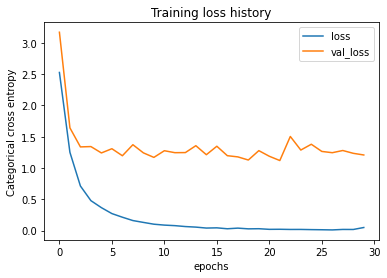

In [124]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

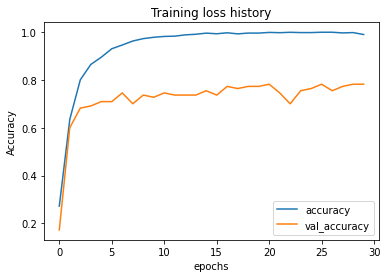

In [125]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

#Create KerasTuner 

In [ ]:
def build_model(hp):  
  model= keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=64, step=2),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(256,256,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=2),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=64, step=2),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5, 
                     directory= 'test_dir',
                     project_name= 'intro_to_kt')

In [ ]:
tuner.search(train_ds, epochs=10, validation_data = validation_ds)

KeyError: ignored